In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_diab = pd.read_csv('diabetes2.csv')

In [3]:
df_diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df_diab.shape

(768, 9)

In [6]:
df_diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df_diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [1]:
len(df_diab[df_diab['BloodPressure']==0])

NameError: name 'df_diab' is not defined

### There are many erroneous values. For example, the blood pressure cannot be zero!! It would indicate a person who is dead, which is not logical. Again, the BMI cannot be zero.

### These issues require domain expertise, so we are going to perform EDA on the dataset as it is.

# Exploratory Data Analysis

## 1. Univariate Analysis

<Figure size 600x400 with 0 Axes>

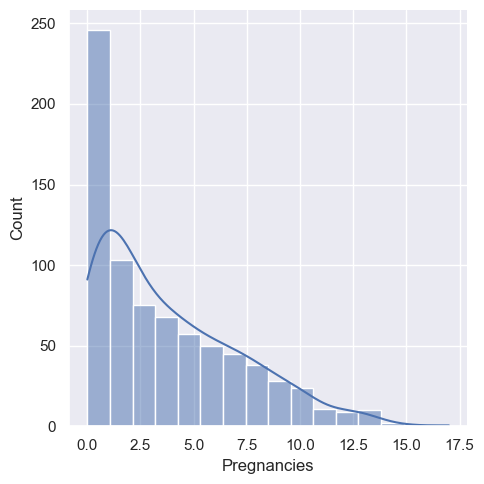

<Figure size 600x400 with 0 Axes>

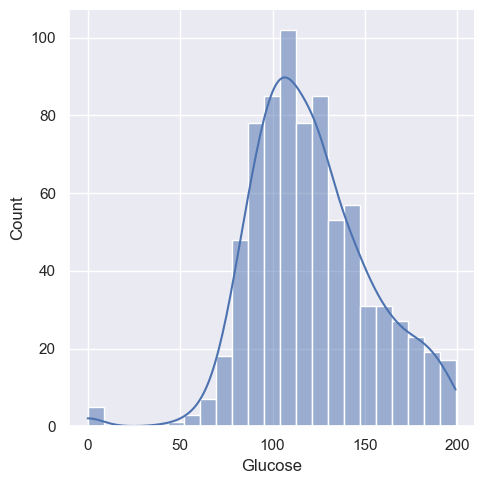

<Figure size 600x400 with 0 Axes>

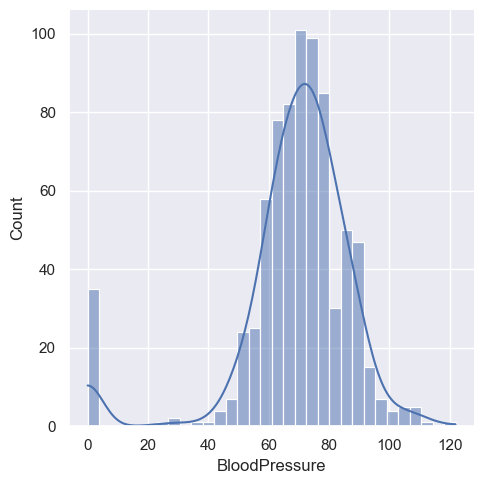

<Figure size 600x400 with 0 Axes>

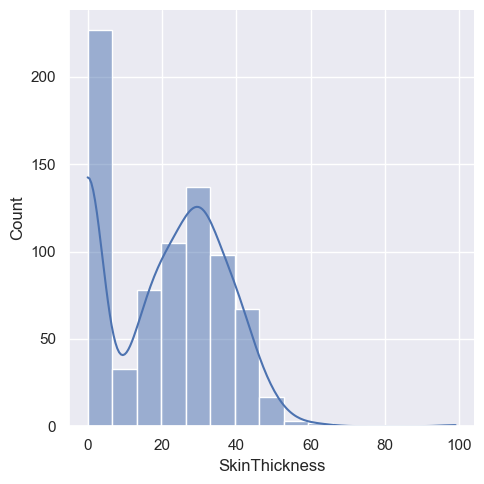

<Figure size 600x400 with 0 Axes>

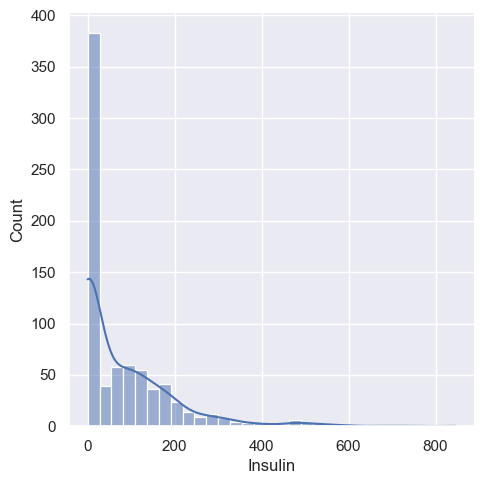

<Figure size 600x400 with 0 Axes>

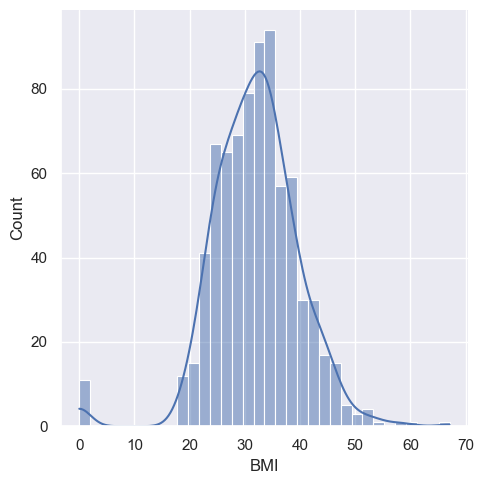

<Figure size 600x400 with 0 Axes>

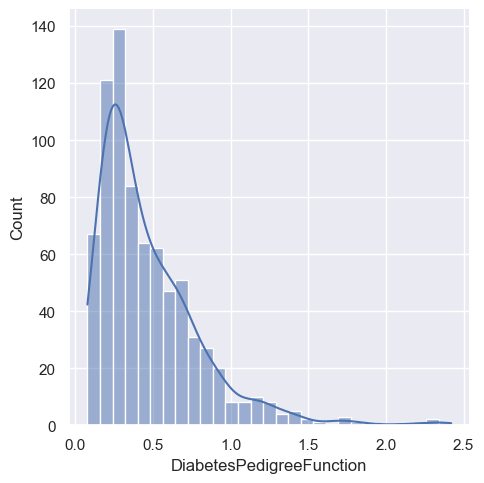

<Figure size 600x400 with 0 Axes>

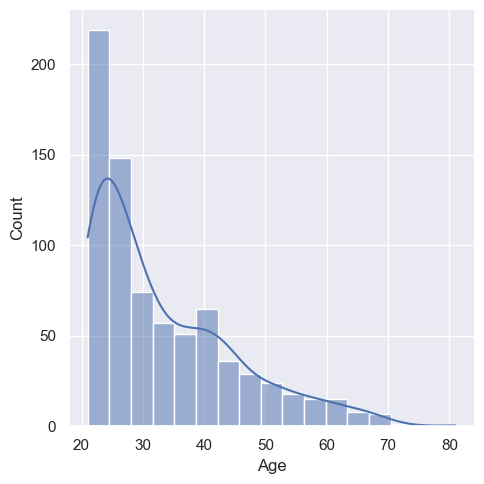

<Figure size 600x400 with 0 Axes>

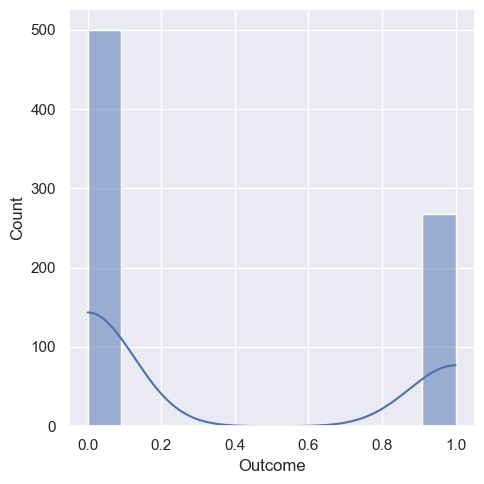

In [9]:
for col in df_diab.columns:
    plt.figure(figsize=(6,4))
    sns.displot(data=df_diab[col], kde= True)
    plt.show()
    

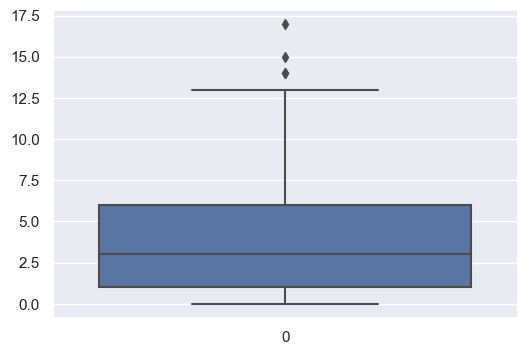

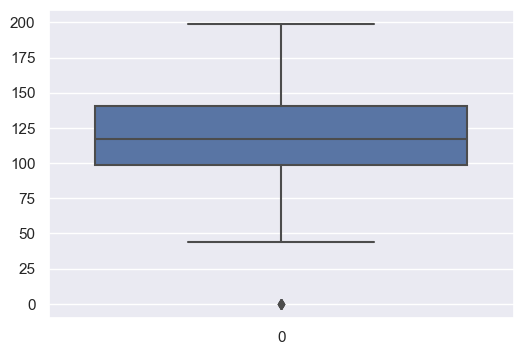

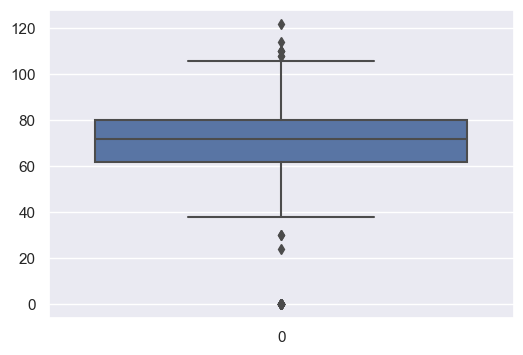

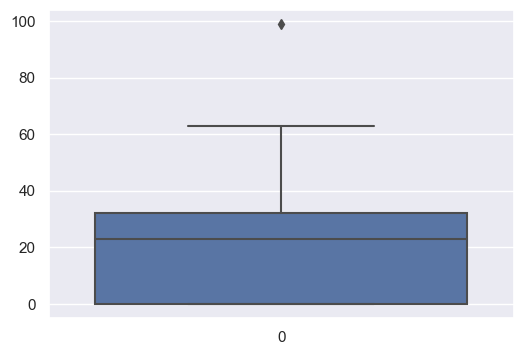

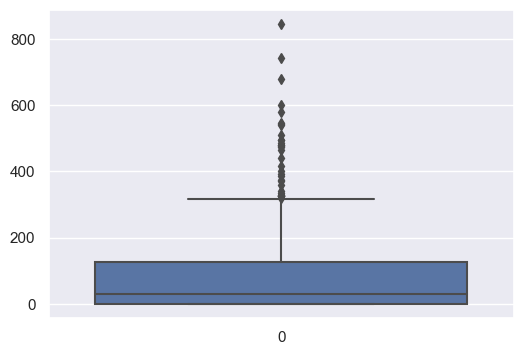

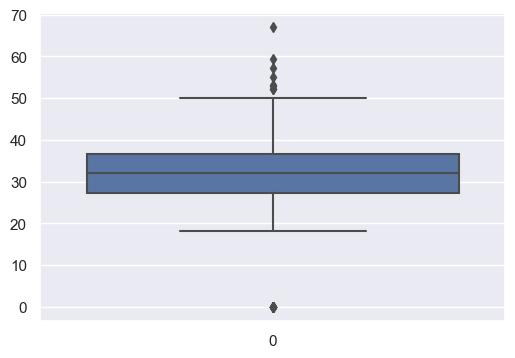

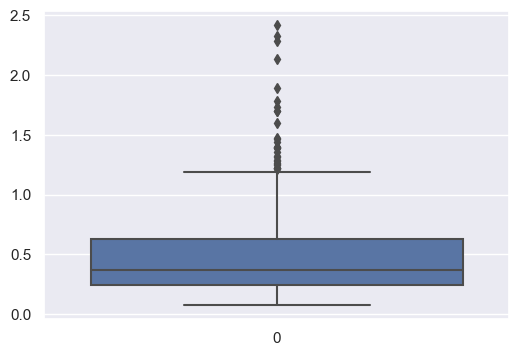

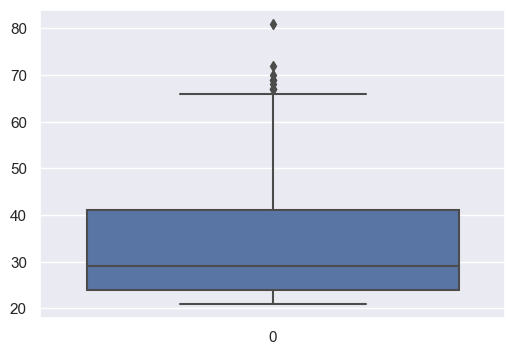

In [19]:
for col in df_diab.columns:
    if col=="Outcome":
        pass
    else:
        plt.figure(figsize=(6,4))
        sns.boxplot(data=df_diab[col])
        plt.show()

In [2]:
plt.figure(figsize=(20,20))
ax = df_diab[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']].plot(kind='box', title='boxplot', showmeans=True)
plt.legend(['Legend'], loc='lower right')
plt.show()

NameError: name 'plt' is not defined

## 2. Bivariate Analysis

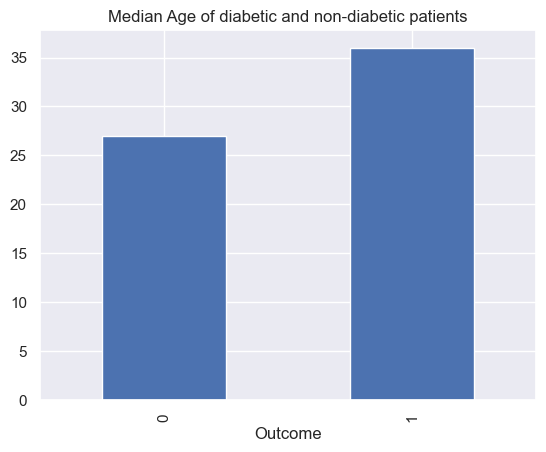

In [18]:
df_diab.groupby('Outcome')['Age'].median().plot(kind='bar')
plt.title('Median Age of diabetic and non-diabetic patients')
plt.show()

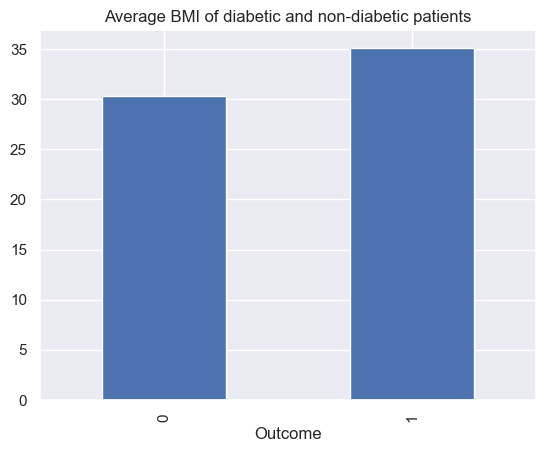

In [11]:
df_diab.groupby('Outcome')['BMI'].mean().plot(kind='bar')
plt.title('Average BMI of diabetic and non-diabetic patients')
plt.show()

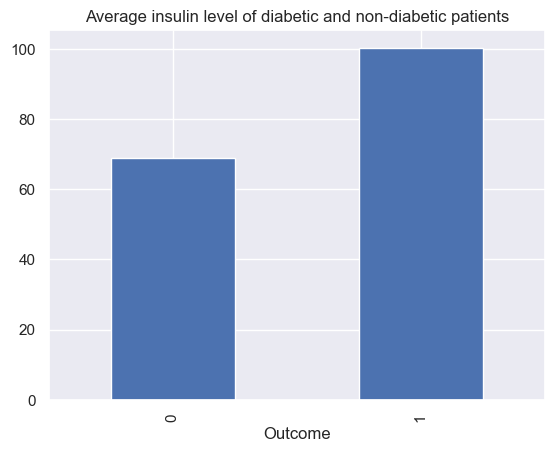

In [12]:
df_diab.groupby('Outcome')['Insulin'].mean().plot(kind='bar')
plt.title('Average insulin level of diabetic and non-diabetic patients')
plt.show()

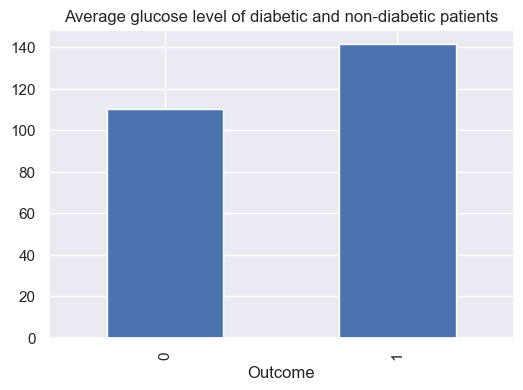

In [13]:
plt.figure(figsize=(6,4))
df_diab.groupby('Outcome')['Glucose'].mean().plot(kind='bar')
plt.title('Average glucose level of diabetic and non-diabetic patients')
plt.show()

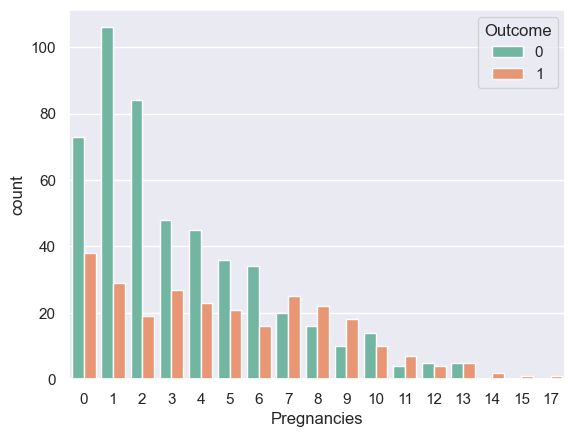

In [14]:
sns.countplot(x='Pregnancies', hue ='Outcome', data=df_diab, palette='Set2')
plt.show()

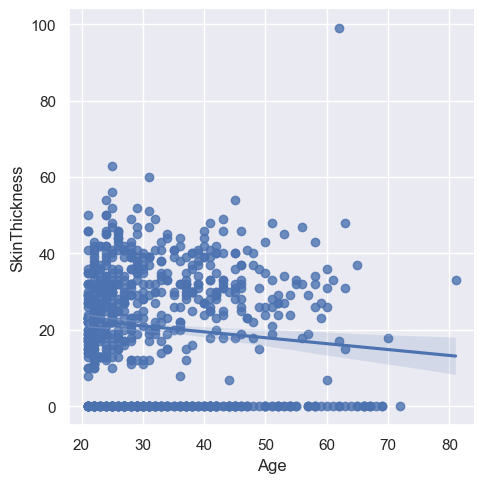

In [15]:
ax = sns.lmplot(x = 'Age', y = 'SkinThickness', data=df_diab, palette='Set1')

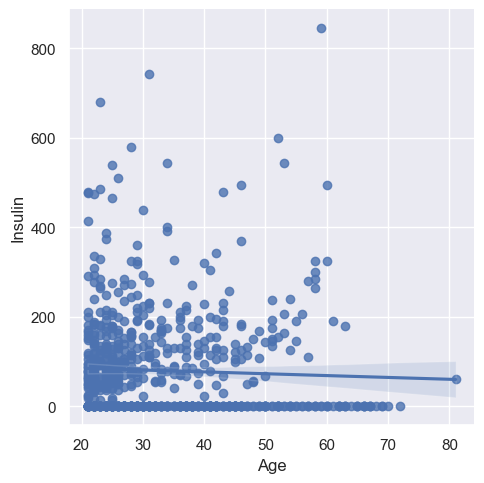

In [17]:
ax = sns.lmplot(x = 'Age', y = 'Insulin', data=df_diab, palette='Set1')

<Axes: >

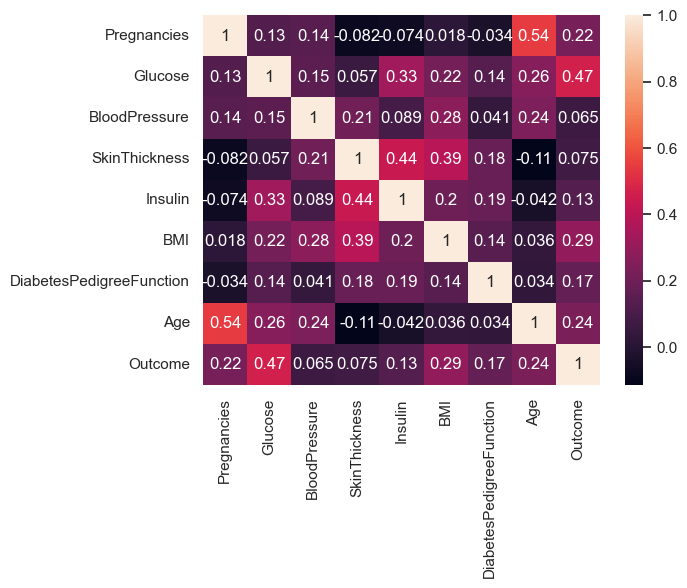

In [16]:
sns.heatmap(df_diab.corr(), annot=True)